# **Phishing Website Detection by Machine Learning Techniques**

## **1. Objective:**
Understanding the use of ML algorithms to detect phishing

## **2. Loading Data:**

In [75]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
#Loading the data
df = pd.read_csv('Phishing.csv')
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0


## **3. Familiarizing with Data**
In this step, few dataframe methods are used to look into the data and its features.

In [77]:
#Checking the shape of the dataset
df.shape

(2456, 31)

In [78]:
#Listing the features of the dataset
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [79]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            2456 non-null   int64
 1   URL_Length                   2456 non-null   int64
 2   Shortining_Service           2456 non-null   int64
 3   having_At_Symbol             2456 non-null   int64
 4   double_slash_redirecting     2456 non-null   int64
 5   Prefix_Suffix                2456 non-null   int64
 6   having_Sub_Domain            2456 non-null   int64
 7   SSLfinal_State               2456 non-null   int64
 8   Domain_registeration_length  2456 non-null   int64
 9   Favicon                      2456 non-null   int64
 10  port                         2456 non-null   int64
 11  HTTPS_token                  2456 non-null   int64
 12  Request_URL                  2456 non-null   int64
 13  URL_of_Anchor                2456 non-null   int

## **4. Visualizing the data**
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

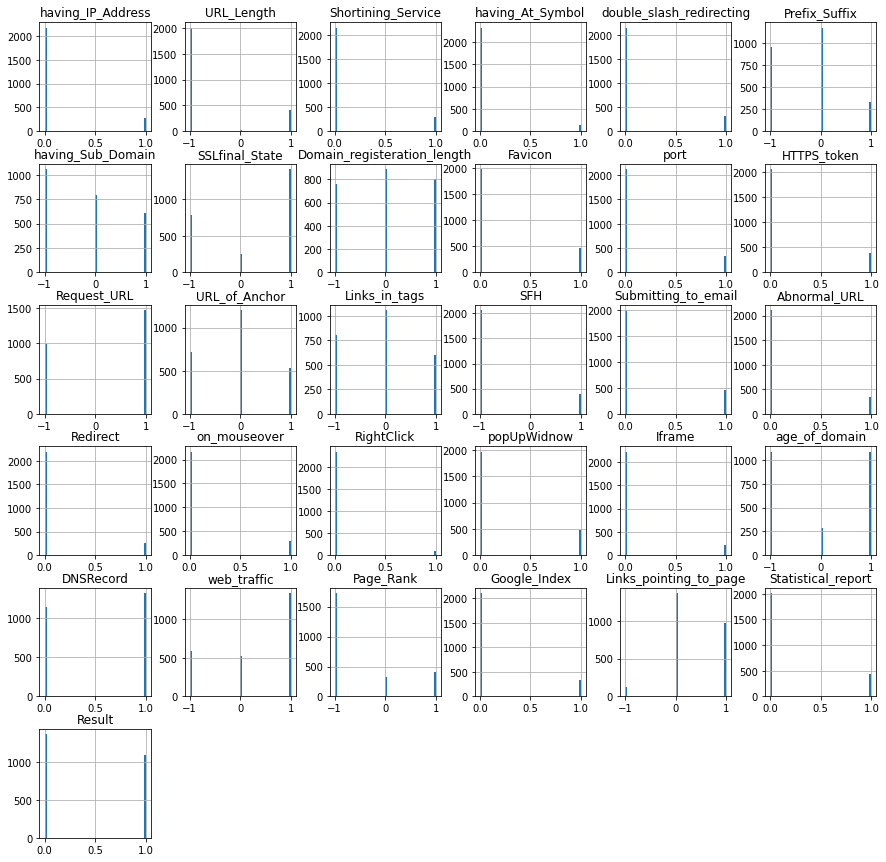

In [80]:
#Plotting the data distribution
df.hist(bins = 50,figsize = (15,15))
plt.show()

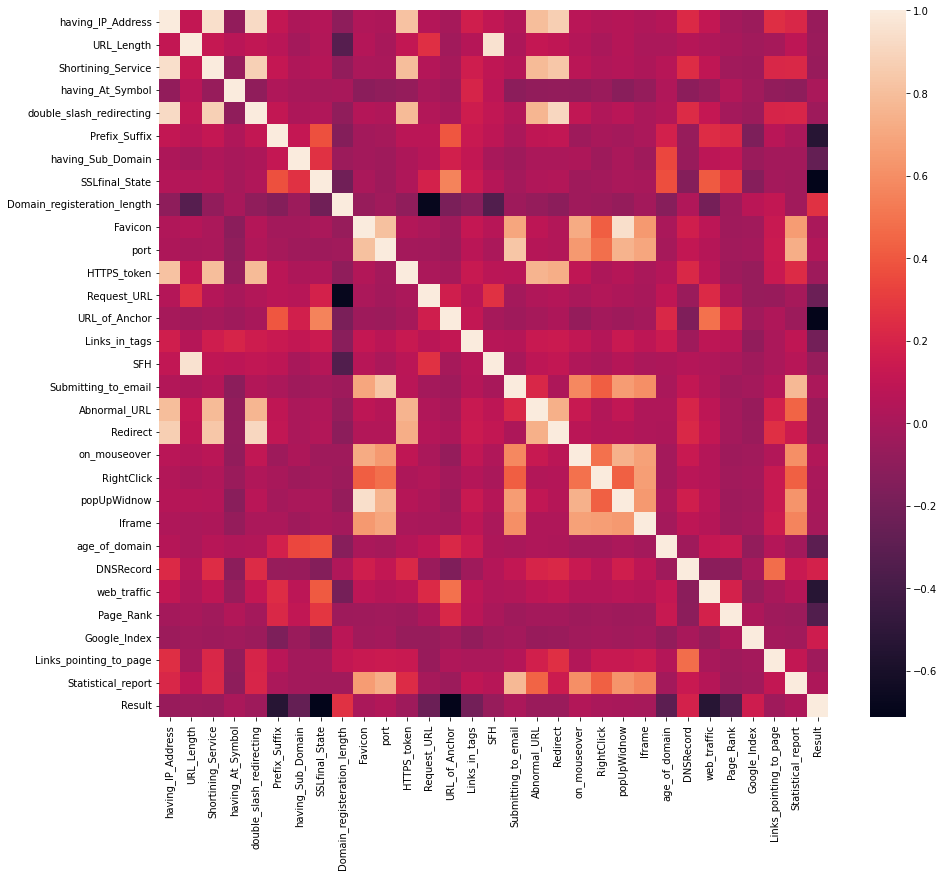

In [81]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(df.corr())
plt.show()

## **5. Data Preprocessing & EDA**
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [82]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,...,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000
mean,0.113192,-0.649837,0.122964,0.054560,0.125407,-0.254886,-0.185668,0.255700,0.018730,0.189739,...,0.196254,0.092020,-0.003257,0.536645,0.304560,-0.540717,0.139658,0.344463,0.179153,0.445440
std,0.316892,0.752690,0.328463,0.227166,0.331247,0.676170,0.802068,0.912332,0.798455,0.392175,...,0.397244,0.289112,0.939726,0.498757,0.834146,0.757832,0.346702,0.568911,0.383559,0.497115
min,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the *'Domain'* column from the dataset. 

In [83]:
#Dropping the Domain column
data = df.copy()

This leaves us with 16 features & a target column. The *'URL_Depth'* maximum value is 20. According to my understanding, there is no necessity to change this column.

In [84]:
# Check for null values
df.isnull().values.any()

False

From the above execution, it is clear that the data doesnot have any missing values.

By this, the data is throughly preprocessed & is ready for training.

## **6. Splitting the Data**

In [85]:
# Sepratating & assigning features and target columns to X & y
X = data.drop('Result',axis=1)
Y = data['Result']
X.shape, Y.shape

((2456, 30), (2456,))

In [86]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((1964, 30), (492, 30))

## **7. Machine Learning Models & Training**
This is a supervised machine learning task.
The input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:
* Decision Tree
* Random Forest
* Multilayer Perceptrons
* Support Vector Machines

In [87]:
#importing packages
from sklearn.metrics import accuracy_score
import itertools
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [88]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
precision = []
recall=[]
f1_score=[]


#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  precision.append(round(b, 3))
  recall.append(round(c, 3))
  f1_score.append(round(d, 3))

### **7.1 Decision Tree Classifier**
 

In [89]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

In [90]:
#predicting the target value from the model for the samples
Y_test_tree = tree.predict(X_test)
Y_train_tree = tree.predict(X_train)

**Performance Evaluation:**

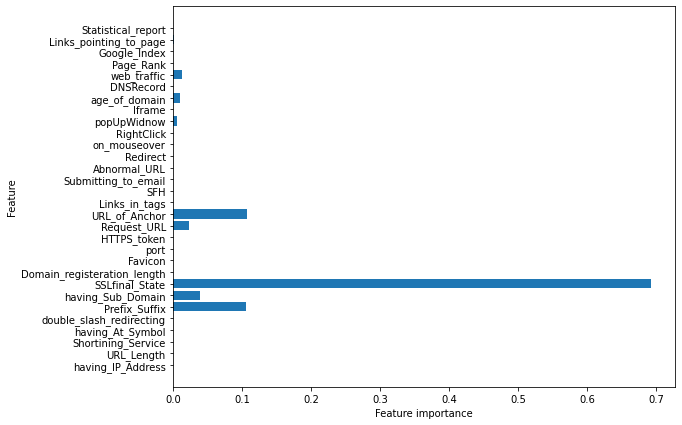

In [91]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [92]:
confusion_matrix_dt = confusion_matrix(Y_test, Y_test_tree)
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

Confusion Matrix - Decision Tree
[[241  21]
 [  7 223]]


In [93]:
print("tp,fp,tn,fn - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_test_tree).ravel()

accuracy_model  =(tp+tn)/(tp+tn+fp+fn)
precision_score =(tp)/(tp+fp)
recall_score  =(tp)/(tp+fn)
f1 =2*(( precision_score * recall_score)/( precision_score + recall_score))

tp,fp,tn,fn - Decision Tree


In [94]:
classification_report_dt = classification_report(Y_test, Y_test_tree)
print("Classification Report - Decision Tree")
print(classification_report_dt)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       262
           1       0.91      0.97      0.94       230

    accuracy                           0.94       492
   macro avg       0.94      0.94      0.94       492
weighted avg       0.94      0.94      0.94       492



**Storing the results:**

In [95]:
storeResults('Decision Tree',accuracy_model,precision_score,recall_score,f1)

### **7.2 Random Forest Classifier**


In [96]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5)

In [97]:
#predicting the target value from the model for the samples
Y_test_forest = forest.predict(X_test)
Y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

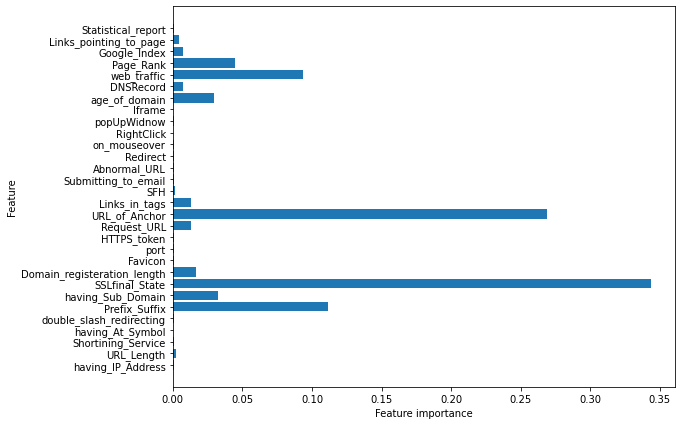

In [98]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [99]:
confusion_matrix_rf = confusion_matrix(Y_test, Y_test_forest)
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf,)

Confusion Matrix - Random Forest
[[257   5]
 [ 16 214]]


In [100]:
print("tp,fp,tn,fn - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_test_forest).ravel()

accuracy_model  =(tp+tn)/(tp+tn+fp+fn)
precision_score =(tp)/(tp+fp)
recall_score  =(tp)/(tp+fn)
f1 =2*(( precision_score * recall_score)/( precision_score + recall_score))

tp,fp,tn,fn - Random Forest


In [101]:
classification_report_rf = classification_report(Y_test, Y_test_forest)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       262
           1       0.98      0.93      0.95       230

    accuracy                           0.96       492
   macro avg       0.96      0.96      0.96       492
weighted avg       0.96      0.96      0.96       492



**Storing the results:**

In [102]:
storeResults('Random Forest',accuracy_model,precision_score,recall_score,f1)

### **7.3 Multilayer Perceptrons (MLPs): Deep Learning**

In [103]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, Y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [104]:
#predicting the target value from the model for the samples
Y_test_mlp = mlp.predict(X_test)
Y_train_mlp = mlp.predict(X_train)

**Performance Evaluation:**

In [105]:
confusion_matrix_mlp = confusion_matrix(Y_test, Y_test_mlp)
print("Confusion Matrix - MLP")
print(confusion_matrix_mlp)

Confusion Matrix - MLP
[[253   9]
 [  8 222]]


In [106]:
print("tp,fp,tn,fn - MLP")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_test_mlp).ravel()

accuracy_model  =(tp+tn)/(tp+tn+fp+fn)
precision_score =(tp)/(tp+fp)
recall_score  =(tp)/(tp+fn)
f1 =2*(( precision_score * recall_score)/( precision_score + recall_score))

tp,fp,tn,fn - MLP


In [107]:
classification_report_mlp = classification_report(Y_test, Y_test_mlp)
print("Classification Report - MLP")
print(classification_report_mlp)

Classification Report - MLP
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       262
           1       0.96      0.97      0.96       230

    accuracy                           0.97       492
   macro avg       0.97      0.97      0.97       492
weighted avg       0.97      0.97      0.97       492



**Storing the results:**

In [108]:
storeResults('MLP',accuracy_model,precision_score,recall_score,f1)

### **7.4 XGBoost Classifier**
XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [109]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7,use_label_encoder =False)
#fit the model
xgb.fit(X_train, Y_train,eval_metric='rmse')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.4, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [110]:
#predicting the target value from the model for the samples
Y_test_xgb = xgb.predict(X_test)
Y_train_xgb = xgb.predict(X_train)

**Performance Evaluation:**

In [111]:
confusion_matrix_xgb = confusion_matrix(Y_test, Y_test_xgb)
print("Confusion Matrix - XGB")
print(confusion_matrix_xgb,)

Confusion Matrix - XGB
[[254   8]
 [ 10 220]]


In [112]:
print("tp,fp,tn,fn - XGB")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_test_xgb).ravel()

accuracy_model  =(tp+tn)/(tp+tn+fp+fn)
precision_score =(tp)/(tp+fp)
recall_score  =(tp)/(tp+fn)
f1 =2*(( precision_score * recall_score)/( precision_score + recall_score))

tp,fp,tn,fn - XGB


In [113]:
classification_report_xgb = classification_report(Y_test, Y_test_xgb)
print("Classification Report - XGB")
print(classification_report_xgb)

Classification Report - XGB
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       262
           1       0.96      0.96      0.96       230

    accuracy                           0.96       492
   macro avg       0.96      0.96      0.96       492
weighted avg       0.96      0.96      0.96       492



**Storing the results:**

In [114]:
storeResults('XGB',accuracy_model,precision_score,recall_score,f1)

### **7.5 Support Vector Machines**

In [115]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, Y_train)

SVC(kernel='linear', random_state=12)

In [116]:
#predicting the target value from the model for the samples
Y_test_svm = svm.predict(X_test)
Y_train_svm = svm.predict(X_train)

**Performance Evaluation:**

In [117]:
confusion_matrix_dt = confusion_matrix(Y_test, Y_test_svm)
print("Confusion Matrix - SVM")
print(confusion_matrix_dt,)

Confusion Matrix - SVM
[[249  13]
 [ 18 212]]


In [118]:
print("tp,fp,tn,fn - SVM")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_test_svm).ravel()

accuracy_model  =(tp+tn)/(tp+tn+fp+fn)
precision_score =(tp)/(tp+fp)
recall_score  =(tp)/(tp+fn)
f1 =2*(( precision_score * recall_score)/( precision_score + recall_score))

tp,fp,tn,fn - SVM


In [119]:
classification_report_dt = classification_report(Y_test, Y_test_svm)
print("Classification Report - Decision Tree")
print(classification_report_dt)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       262
           1       0.94      0.92      0.93       230

    accuracy                           0.94       492
   macro avg       0.94      0.94      0.94       492
weighted avg       0.94      0.94      0.94       492



**Storing the results:**

In [120]:
storeResults('SVM',accuracy_model,precision_score,recall_score,f1)

## **8. Comparision of Models**
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [121]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score})
results

,ML Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.943,0.914,0.970,0.941
1,Random Forest,0.957,0.977,0.930,0.953
2,MLP,0.965,0.961,0.965,0.963
3,XGB,0.963,0.965,0.957,0.961
4,SVM,0.937,0.942,0.922,0.932


In [122]:
#Sorting the datafram on accuracy
results.sort_values(by=['Accuracy', 'Precision'], ascending=False)

,ML Model,Accuracy,Precision,Recall,F1-Score
2,MLP,0.965,0.961,0.965,0.963
3,XGB,0.963,0.965,0.957,0.961
1,Random Forest,0.957,0.977,0.930,0.953
0,Decision Tree,0.943,0.914,0.970,0.941
4,SVM,0.937,0.942,0.922,0.932


For the above comparision, it is clear that the MLP and XGB Classifiers work well with this dataset.
<br>Also Decision can be considered too since it has good accuracy and highest precision ie it has highest recall value.